# Gradient descent demo 
Math 395 Learning from Large Data Sets 

Fall 2024, Hope College

## import libraries

In [28]:
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt

## display level sets

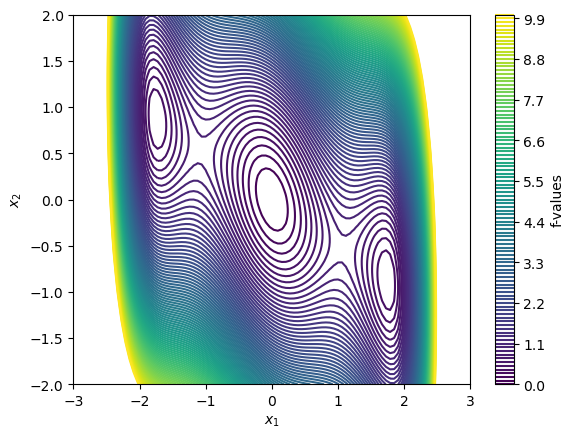

In [29]:
# Generating grid
x = np.linspace(-3, 3, 100)
y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y) 

# 3-hump camel function
# 2x^2-1.05x^4+((x^6)/6)+xy+y^2
# d/dx = 4x-4.2x^3+x^5+y
# d/dy = x+2y
Z = 2*X**2 - 1.05*X**4 + X**6/6 + X*Y + Y**2

# Defining contour levels
levels = np.linspace(0, 10, 101)

# Creating contour plot
contour = plt.contour(X, Y, Z,levels = levels)

# Adding colorbar
plt.colorbar(contour, label='f-values')

# Adding labels and title
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
#plt.title('$f$')

# Displaying the plot
plt.show()

## gradient descent around the origin

In [30]:
# initial guess 
x1 = 2
x2 = -2

z = 2*x1**2 - 1.05*x1**4 + x1**6/6 + x1*x2 + x2**2

# set learning rate
eta = 0.3

# set number of iterations
k = 30

# recording x1,x2,f values
x1vals = np.array(x1)
x2vals = np.array(x2)
fvals = np.array(z)

for i in range(k):
    
    # updating x1, x2 simultaneously using the gradient at previous point (x1,x2)
    x1, x2 = x1 - eta * (4*x1- 4.2*x1**3 + x1**5 + x2), x2 - eta * (x1 + 2*x2)
    
    # #the following code would be a little bit different, as it updates x1 first, then x2 using the new x1.
    # x1 = x1 - eta * (4*x1- 4.2*x1**3 + x1**5 + x2)
    # x2 = x2 - eta * (x1 + 2*x2)
    
    x1vals = np.append(x1vals, x1)
    x2vals = np.append(x2vals, x2)
    
    # recording the function value at the new point
    z = 2*x1**2 - 1.05*x1**4 + x1**6/6 + x1*x2 + x2**2
    fvals = np.append(fvals, z)
    
print('x1 = ', x1vals)
print('x2 = ', x2vals)
print('f = ',fvals)
    

x1 =  [2.00000000e+00 6.80000000e-01 6.36566313e-01 3.95542951e-01
 1.44932058e-01 7.00175274e-02 3.75472808e-02 1.93063104e-02
 1.02266963e-02 5.32513313e-03 2.80321621e-03 1.46586752e-03
 7.69713128e-04 4.03139092e-04 2.11478903e-04 1.10829405e-04
 5.81172914e-05 3.04644567e-05 1.59728308e-05 8.37352380e-06
 4.39008600e-06 2.30151624e-06 1.20661787e-06 6.32581335e-07
 3.31641305e-07 1.73867088e-07 9.11524394e-08 4.77878928e-08
 2.50534933e-08 1.31346404e-08 6.88602194e-09]
x2 =  [-2.00000000e+00 -1.40000000e+00 -7.64000000e-01 -4.96569894e-01
 -3.17290843e-01 -1.70395955e-01 -8.91636401e-02 -4.69296403e-02
 -2.45637492e-02 -1.28935086e-02 -6.75494337e-03 -3.54294221e-03
 -1.85693714e-03 -9.73688795e-04 -5.10417246e-04 -2.67610569e-04
 -1.40293049e-04 -7.35524071e-05 -3.85602998e-05 -2.02159692e-05
 -1.05984448e-05 -5.55640372e-06 -2.91301636e-06 -1.52719191e-06
 -8.00651163e-07 -4.19752857e-07 -2.20061269e-07 -1.15370239e-07
 -6.04844636e-08 -3.17098334e-08 -1.66243255e-08]
f =  [1.8

### display the path of gradient descent

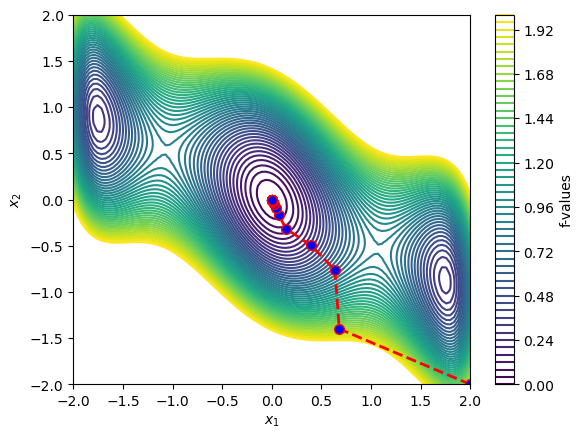

In [31]:
# choose a new, localized grid around the target point to zoom in
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y) 
Z = 2*X**2 - 1.05*X**4 + X**6/6 + X*Y + Y**2

levels = np.linspace(0, 2, 51)

contour = plt.contour(X, Y, Z,levels = levels)
plt.colorbar(contour, label='f-values')

plt.plot(x1vals, x2vals, color='red',linestyle='dashed',linewidth =2,
         marker='o', markerfacecolor='blue', markersize=7)

# Adding labels and title
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
#plt.title('$f(x_1,x_2)=2x_1^2 + x_2^4 - 4 x_1 x_2$')

# Displaying the plot
plt.show()

### plot the f-convergence curve

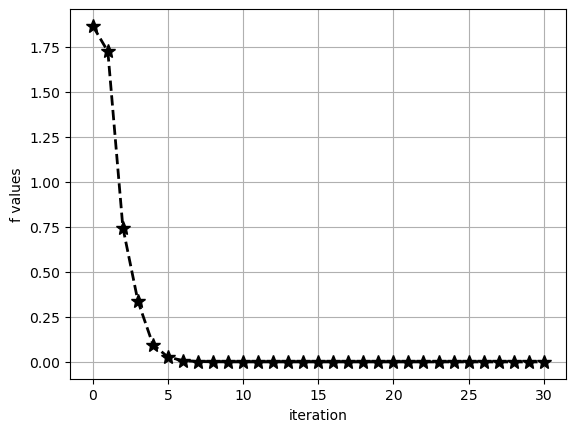

In [32]:
plt.plot(fvals, color='black',linestyle='dashed',linewidth =2,
         marker='*', markersize=10)
plt.xlabel('iteration')
plt.ylabel('f values')
plt.grid('on')

### plot the x-convergence curve

[1.44996552e+00 6.37481361e-01 3.60015448e-01 3.08134383e-01
 1.64894800e-01 8.74814600e-02 4.60048230e-02 2.41386096e-02
 1.26577975e-02 6.63641829e-03 3.47928915e-03 1.82407347e-03
 9.56297112e-04 5.01352328e-04 2.62841023e-04 1.37798105e-04
 7.22425953e-05 3.78741969e-05 1.98560805e-05 1.04098296e-05
 5.45749961e-06 2.86117095e-06 1.50000912e-06 7.86400886e-07
 4.12281728e-07 2.16144496e-07 1.13316793e-07 5.94079229e-08
 3.11454394e-08]


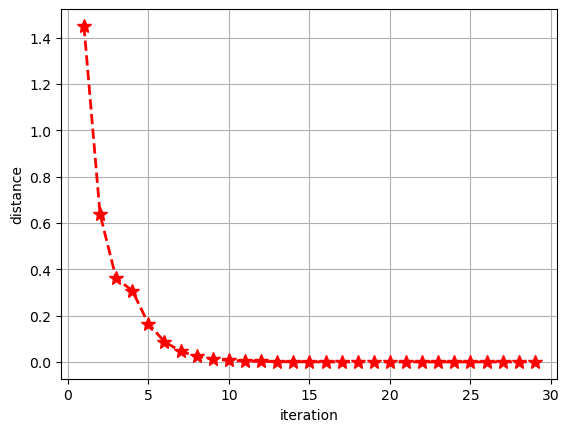

In [33]:
# computing distances between consecutive points along the path
dists = []
for i in range(1,k):
    dists = np.append(dists, np.sqrt((x1vals[i]-x1vals[i-1])**2+(x2vals[i]-x2vals[i-1])**2))

print(dists)  
    
plt.plot(range(1,30), dists, color='red',linestyle='dashed',linewidth =2,
         marker='*', markersize=10)
plt.xlabel('iteration')
plt.ylabel('distance')
plt.grid('on')